## **IT3212 - Assignment 1**

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

- [Task 1 - Data Exploration](#task_1)
- [Task 2 - Data Cleaning](#task_2)
- [Task 3 - Handling Outliers](#task_3)
- [Task 4 - Data Transformation](#task_4)
- [Task 5 - Data Splitting](#task_5)
- [Task 6 - Bonus Task](#task_6)

 <a id='task_1'></a>
### **TASK 1 - Data Exploration (10p)**

**(a) Explore the dataset by**
- ✅ displaying the first few rows
- ✅ summary statistics
- ✅ data types of each column

**(b) Identify**
- ✅ missing values and outliers
- ✅ unique values in categorical columns

In [364]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
holidays = pd.read_csv("../data/holidays_events.csv")
oil = pd.read_csv("../data/oil.csv")
stores = pd.read_csv("../data/stores.csv")
transactions = pd.read_csv("../data/transactions.csv")

train['date'] = pd.to_datetime(train['date'])
train['date'] = train['date'].astype(int)

test['date'] = pd.to_datetime(test['date'])
test['date'] = test['date'].astype(int)

oil['date'] = pd.to_datetime(oil['date'])
oil['date'] = oil['date'].astype(int)

transactions['date'] = pd.to_datetime(transactions['date'])
transactions['date'] = transactions['date'].astype(int)

holidays['date'] = pd.to_datetime(holidays['date'])
holidays['date'] = holidays['date'].astype(int)

____
### **Table: train.csv**

In [365]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,1356998400000000000,1,AUTOMOTIVE,0.0,0
1,1,1356998400000000000,1,BABY CARE,0.0,0
2,2,1356998400000000000,1,BEAUTY,0.0,0
3,3,1356998400000000000,1,BEVERAGES,0.0,0
4,4,1356998400000000000,1,BOOKS,0.0,0


In [366]:
print(train['family'].unique())

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


In [367]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           3000888 non-null  int64  
 1   date         3000888 non-null  int64  
 2   store_nbr    3000888 non-null  int64  
 3   family       3000888 non-null  object 
 4   sales        3000888 non-null  float64
 5   onpromotion  3000888 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 137.4+ MB


In [368]:
train.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,1.429864e+18,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,4.211536e+16,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.356998e+18,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.393438e+18,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,1.429877e+18,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,1.466316e+18,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,1.502755e+18,5.400000e+01,1.247170e+05,7.410000e+02


In [369]:
print(train.isna().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


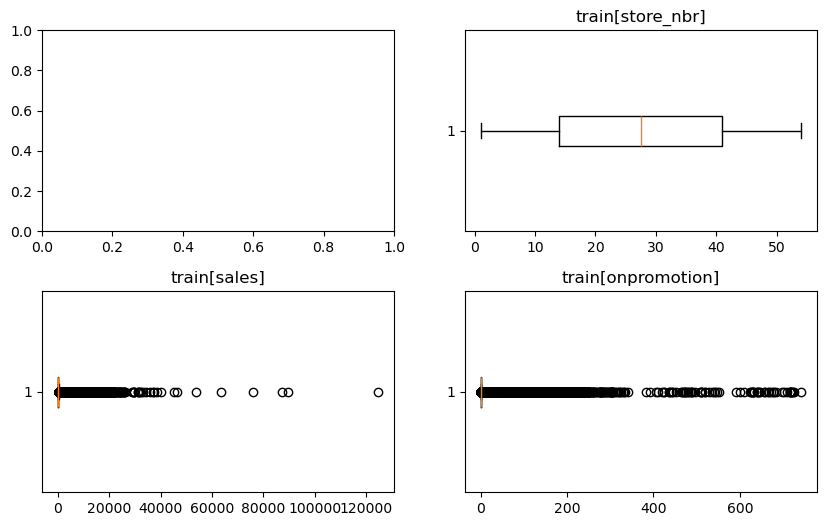

In [370]:
fig, axs = plt.subplots(2,2,figsize=(10, 6)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
#axs[0,0].boxplot(x=train['date'], vert=False); axs[0,0].set_title('train[date]')
axs[0,1].boxplot(x=train['store_nbr'], vert=False); axs[0,1].set_title('train[store_nbr]')
axs[1,0].boxplot(x=train['sales'], vert=False); axs[1,0].set_title('train[sales]')
axs[1,1].boxplot(x=train['onpromotion'], vert=False); axs[1,1].set_title('train[onpromotion]')
plt.show()

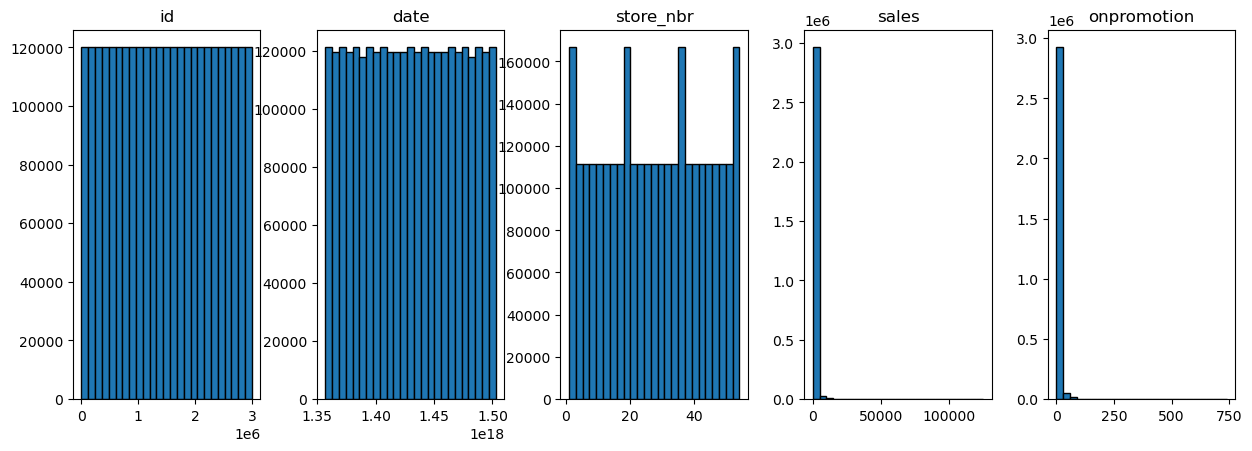

In [371]:
fig, axis = plt.subplots(1, 5); fig.set_figwidth(15)
train.hist(ax=axis, edgecolor='black', grid=False, bins=25); plt.show()

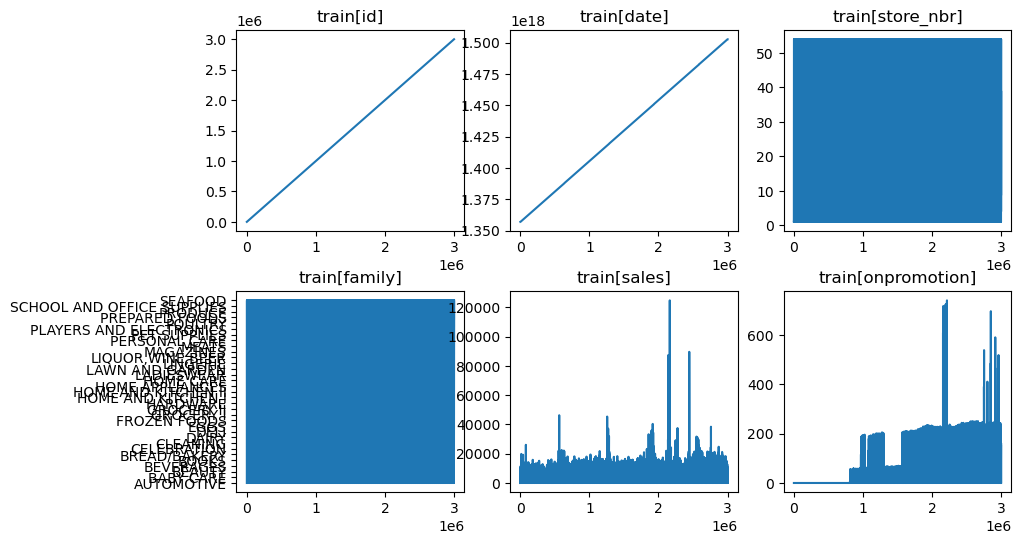

In [372]:
fig, axs = plt.subplots(2,3,figsize=(10, 6)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0,0].plot(train['id']); axs[0,0].set_title('train[id]')
axs[0,1].plot(train['date']); axs[0,1].set_title('train[date]')
axs[0,2].plot(train['store_nbr']); axs[0,2].set_title('train[store_nbr]')
axs[1,0].plot(train['family']); axs[1,0].set_title('train[family]')
axs[1,1].plot(train['sales']); axs[1,1].set_title('train[sales]')
axs[1,2].plot(train['onpromotion']); axs[1,2].set_title('train[onpromotion]')
plt.show()

___
### **Table: test**

In [373]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,1502841600000000000,1,AUTOMOTIVE,0
1,3000889,1502841600000000000,1,BABY CARE,0
2,3000890,1502841600000000000,1,BEAUTY,2
3,3000891,1502841600000000000,1,BEVERAGES,20
4,3000892,1502841600000000000,1,BOOKS,0


In [374]:
print(test['family'].unique())

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


In [375]:
test.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  int64 
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ MB


In [376]:
test.describe()

,id,date,store_nbr,onpromotion
count,2.851200e+04,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,1.503490e+18,27.500000,6.965383
std,8.230850e+03,3.982913e+14,15.586057,20.683952
min,3.000888e+06,1.502842e+18,1.000000,0.000000
25%,3.008016e+06,1.503166e+18,14.000000,0.000000
50%,3.015144e+06,1.503490e+18,27.500000,0.000000
75%,3.022271e+06,1.503814e+18,41.000000,6.000000
max,3.029399e+06,1.504138e+18,54.000000,646.000000


In [377]:
print(test.isna().sum())

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


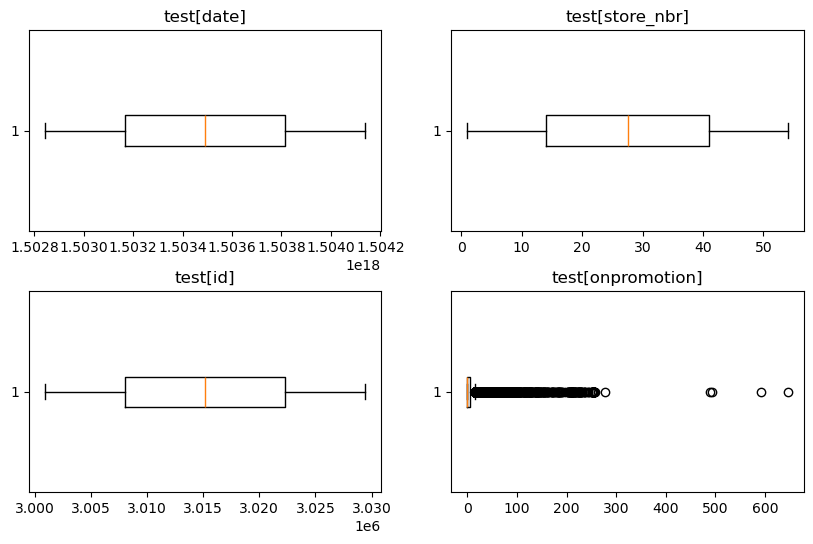

In [378]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0,0].boxplot(x=test['date'], vert=False); axs[0,0].set_title('test[date]')
axs[0,1].boxplot(x=test['store_nbr'], vert=False); axs[0,1].set_title('test[store_nbr]')
axs[1,0].boxplot(x=test['id'], vert=False); axs[1,0].set_title('test[id]')
axs[1,1].boxplot(x=test['onpromotion'], vert=False); axs[1,1].set_title('test[onpromotion]')
plt.show()

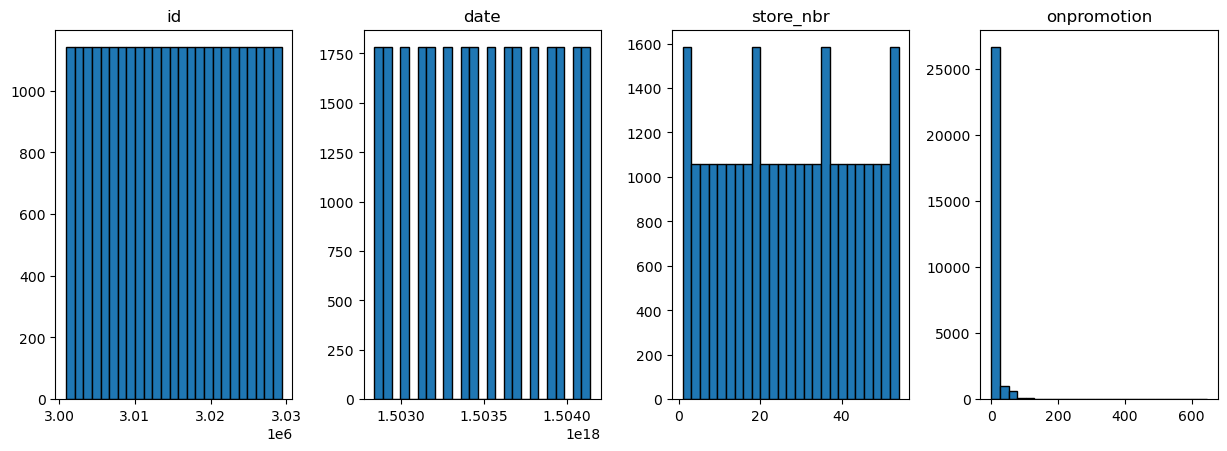

In [379]:
fig, axis = plt.subplots(1, 4); fig.set_figwidth(15)
test.hist(ax=axis, edgecolor='black', grid=False, bins=25); plt.show()

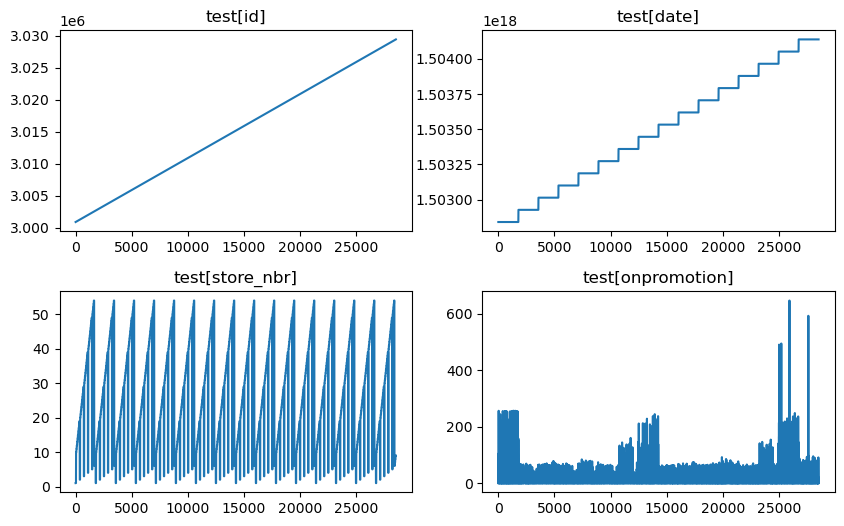

In [380]:
fig, axs = plt.subplots(2,2,figsize=(10, 6)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0,0].plot(test['id']); axs[0,0].set_title('test[id]')
axs[0,1].plot(test['date']); axs[0,1].set_title('test[date]')
axs[1,0].plot(test['store_nbr']); axs[1,0].set_title('test[store_nbr]')
axs[1,1].plot(test['onpromotion']); axs[1,1].set_title('test[onpromotion]')
plt.show()

___
### **Table: holidays.csv**

In [381]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,1330646400000000000,Holiday,Local,Manta,Fundacion de Manta,False
1,1333238400000000000,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,1334188800000000000,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,1334361600000000000,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,1334966400000000000,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [382]:
print(holidays['type'].unique())

['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']


In [383]:
print(holidays['locale'].unique())

['Local' 'Regional' 'National']


In [384]:
print(holidays['locale_name'].unique())

['Manta' 'Cotopaxi' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda'
 'Imbabura' 'Latacunga' 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe'
 'Esmeraldas' 'Ecuador' 'Ambato' 'Ibarra' 'Quevedo'
 'Santo Domingo de los Tsachilas' 'Santa Elena' 'Quito' 'Loja' 'Salinas'
 'Guayaquil']


In [385]:
print(holidays['description'].unique())

['Fundacion de Manta' 'Provincializacion de Cotopaxi'
 'Fundacion de Cuenca' 'Cantonizacion de Libertad'
 'Cantonizacion de Riobamba' 'Cantonizacion del Puyo'
 'Cantonizacion de Guaranda' 'Provincializacion de Imbabura'
 'Cantonizacion de Latacunga' 'Fundacion de Machala'
 'Fundacion de Santo Domingo' 'Cantonizacion de El Carmen'
 'Cantonizacion de Cayambe' 'Fundacion de Esmeraldas'
 'Primer Grito de Independencia' 'Fundacion de Riobamba'
 'Fundacion de Ambato' 'Fundacion de Ibarra' 'Cantonizacion de Quevedo'
 'Independencia de Guayaquil' 'Traslado Independencia de Guayaquil'
 'Dia de Difuntos' 'Independencia de Cuenca'
 'Provincializacion de Santo Domingo' 'Provincializacion Santa Elena'
 'Independencia de Guaranda' 'Independencia de Latacunga'
 'Independencia de Ambato' 'Fundacion de Quito-1' 'Fundacion de Quito'
 'Fundacion de Loja' 'Navidad-4' 'Cantonizacion de Salinas' 'Navidad-3'
 'Navidad-2' 'Puente Navidad' 'Navidad-1' 'Navidad' 'Navidad+1'
 'Puente Primer dia del ano' 'Primer 

In [386]:
holidays.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    int64 
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 14.1+ KB


In [387]:
holidays.describe()

,date
count,3.500000e+02
mean,1.429836e+18
std,5.048637e+16
min,1.330646e+18
25%,1.387778e+18
50%,1.433722e+18
75%,1.467504e+18
max,1.514246e+18


In [388]:
print(holidays.isna().sum())

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


___
### **Table: oil.csv**

In [389]:
oil.head()

,date,dcoilwtico
0,1356998400000000000,NaN
1,1357084800000000000,93.14
2,1357171200000000000,92.97
3,1357257600000000000,93.12
4,1357516800000000000,93.20


In [390]:
oil.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   int64  
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 19.2 KB


In [391]:
oil.describe()

,date,dcoilwtico
count,1.218000e+03,1175.000000
mean,1.430568e+18,67.714366
std,4.254778e+16,25.630476
min,1.356998e+18,26.190000
25%,1.393826e+18,46.405000
50%,1.430568e+18,53.190000
75%,1.467310e+18,95.660000
max,1.504138e+18,110.620000


In [392]:
print(oil.isna().sum())

date           0
dcoilwtico    43
dtype: int64


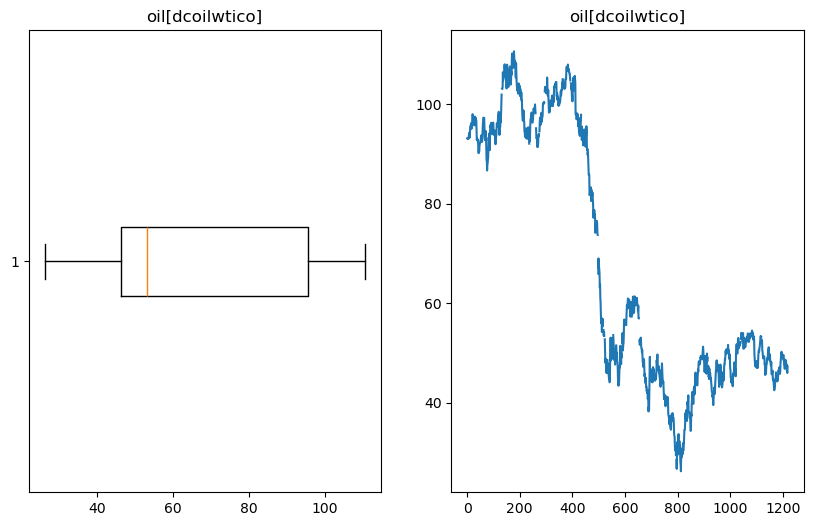

In [393]:
fig, axs = plt.subplots(1,2,figsize=(10, 6)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0].boxplot(x=oil['dcoilwtico'].dropna(), vert=False); axs[0].set_title('oil[dcoilwtico]')
axs[1].plot(oil['dcoilwtico']); axs[1].set_title('oil[dcoilwtico]')
plt.show()

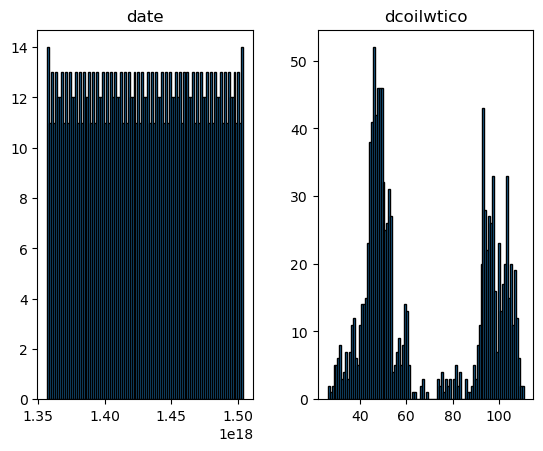

In [394]:
oil.hist(edgecolor='black', grid=False, bins=100); plt.show()

___
### **Table: stores.csv**

In [395]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [396]:
print(stores['city'].unique())

['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']


In [397]:
print(stores['state'].unique())

['Pichincha' 'Santo Domingo de los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Pastaza' 'Tungurahua' 'Guayas' 'Santa Elena'
 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi']


In [398]:
print(stores['type'].unique())

['D' 'B' 'C' 'E' 'A']


In [399]:
stores.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [400]:
stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [401]:
print(stores.isna().sum())

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


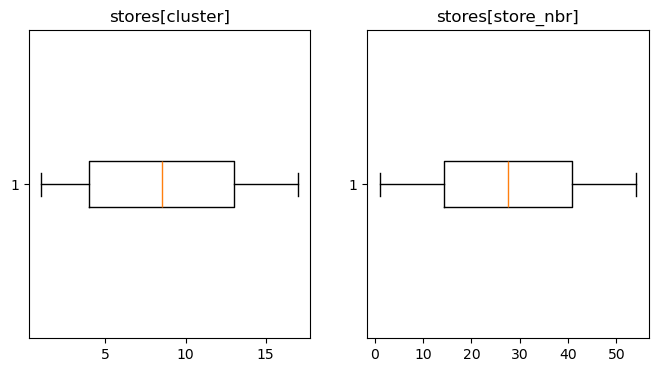

In [402]:
fig, axs = plt.subplots(1,2,figsize=(8, 4)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0].boxplot(x=stores['cluster'], vert=False); axs[0].set_title('stores[cluster]')
axs[1].boxplot(x=stores['store_nbr'], vert=False); axs[1].set_title('stores[store_nbr]')
plt.show()

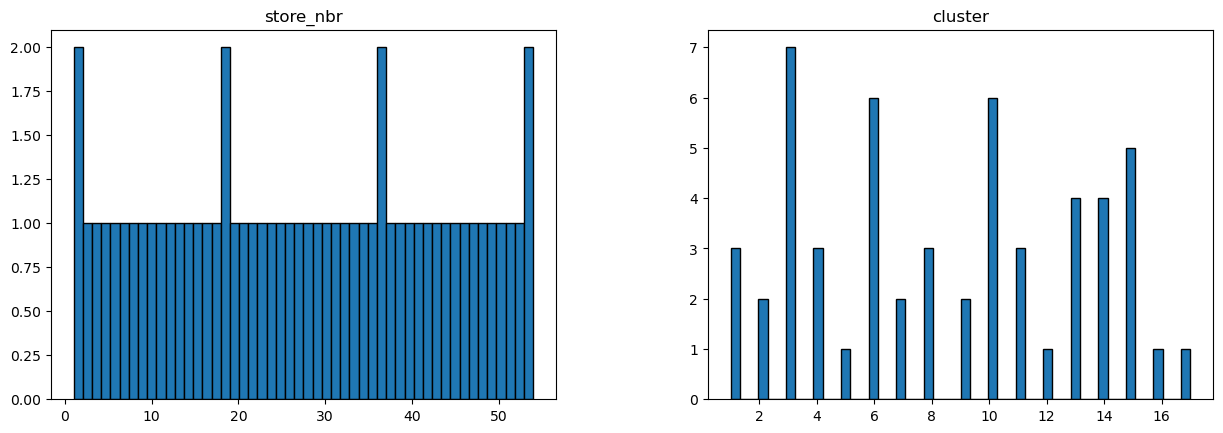

In [403]:
fig, axis = plt.subplots(1, 2); fig.set_figwidth(15)
stores.hist(ax=axis, edgecolor='black', grid=False, bins=50); plt.show()

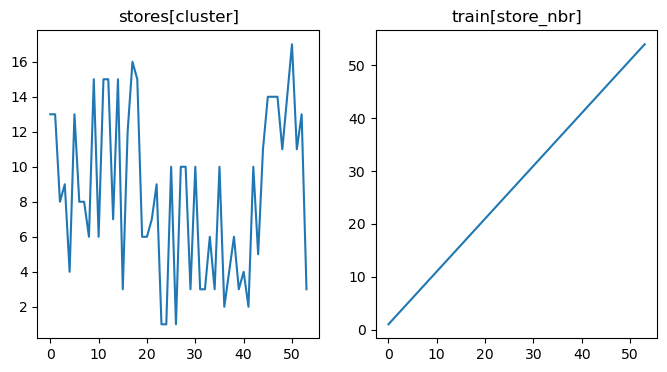

In [404]:
fig, axs = plt.subplots(1,2,figsize=(8, 4)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0].plot(stores['cluster']); axs[0].set_title('stores[cluster]')
axs[1].plot(stores['store_nbr']); axs[1].set_title('train[store_nbr]')
plt.show()

___
### **Table: transactions.csv**

In [405]:
transactions.head()

,date,store_nbr,transactions
0,1356998400000000000,25,770
1,1357084800000000000,1,2111
2,1357084800000000000,2,2358
3,1357084800000000000,3,3487
4,1357084800000000000,4,1922


In [406]:
transactions.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   date          83488 non-null  int64
 1   store_nbr     83488 non-null  int64
 2   transactions  83488 non-null  int64
dtypes: int64(3)
memory usage: 1.9 MB


In [407]:
transactions.describe()

,date,store_nbr,transactions
count,8.348800e+04,83488.000000,83488.000000
mean,1.432138e+18,26.939237,1694.602158
std,4.208052e+16,15.608204,963.286644
min,1.356998e+18,1.000000,5.000000
25%,1.395878e+18,13.000000,1046.000000
50%,1.433722e+18,27.000000,1393.000000
75%,1.468476e+18,40.000000,2079.000000
max,1.502755e+18,54.000000,8359.000000


In [408]:
print(transactions.isna().sum())

date            0
store_nbr       0
transactions    0
dtype: int64


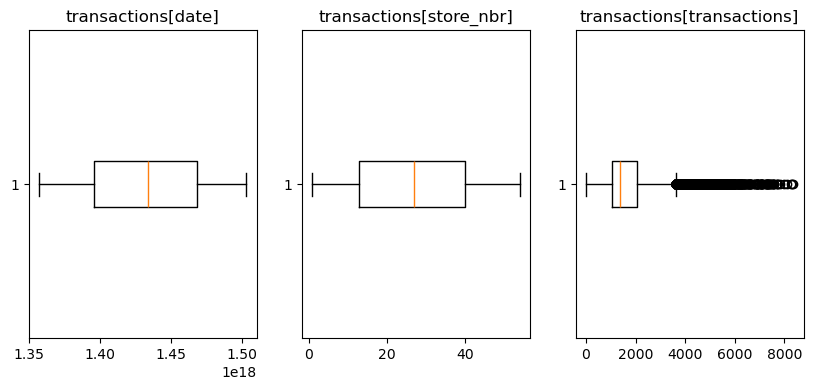

In [409]:
fig, axs = plt.subplots(1,3,figsize=(10, 4)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0].boxplot(x=transactions['date'], vert=False); axs[0].set_title('transactions[date]')
axs[1].boxplot(x=transactions['store_nbr'], vert=False); axs[1].set_title('transactions[store_nbr]')
axs[2].boxplot(x=transactions['transactions'], vert=False); axs[2].set_title('transactions[transactions]')
plt.show()

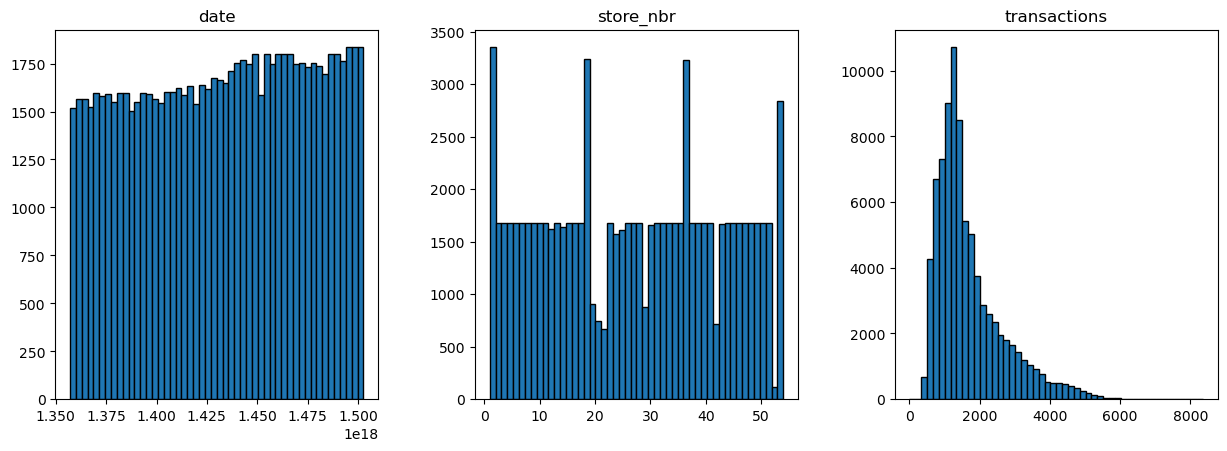

In [410]:
fig, axis = plt.subplots(1, 3); fig.set_figwidth(15)
transactions.hist(ax=axis, edgecolor='black', grid=False, bins=50); plt.show()

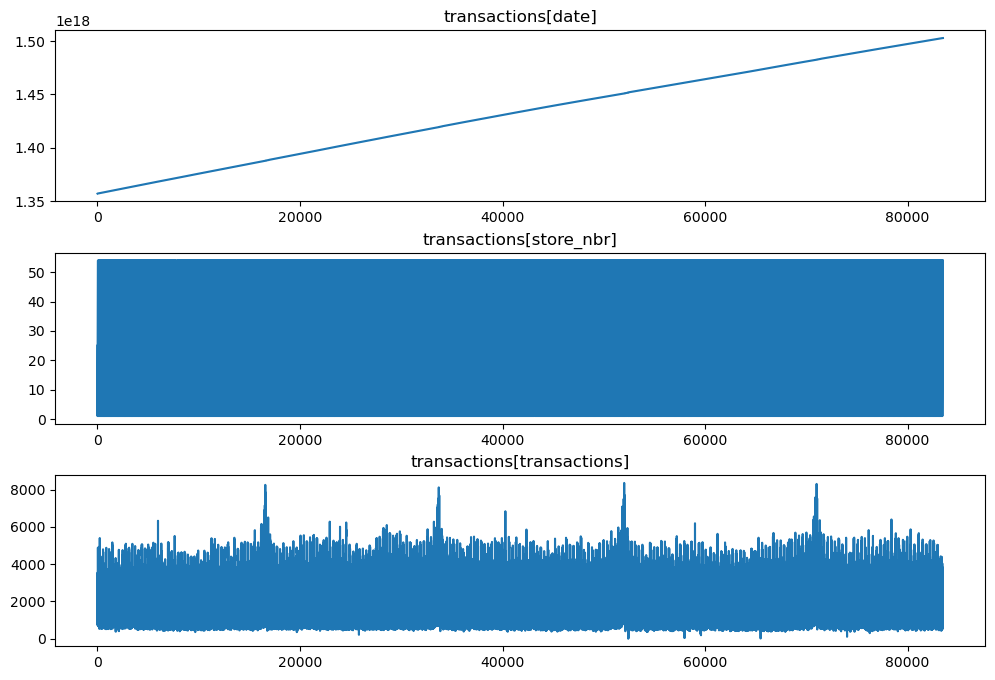

In [411]:
fig, axs = plt.subplots(3,1,figsize=(12, 8)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0].plot(transactions['date']); axs[0].set_title('transactions[date]')
axs[1].plot(transactions['store_nbr']); axs[1].set_title('transactions[store_nbr]')
axs[2].plot(transactions['transactions']); axs[2].set_title('transactions[transactions]')
plt.show()

<a id='task_2'></a>

### **TASK 2 - Data Cleaning (20p)**
**(a) Handling Missing Values** ✅ 

**(b) Choose appropriate methods to handle missing values** ✅ 

**(c) Justify your choices for handling missing data** ✅ 
<br>
Initial data exploration revealed that only table oil['dcoilwtico_old'] is missing values. Dropping all rows containing one or several columns of missing values is a simple solution, but should be avoided if possible as you risk loosing too much valuable information. Secondly it introduces issues when trying feature engineering this table with others (mismatching rows). Of course if a column is missing major part of its data, one might consider discarding/deleting the column altogether.

By visual inspection there are no substantial sections missing, and those intervals of missing values seem to be of constant rate of change. If possible imputing missing values with statistical approximation methods is prefered. 

Statistical mean or median provide good estimates of missing values if the data is normally distributed, but dealing with oil prices these often vary quite stochasticly and the distribution was not normal. In this case interpolation was giving the best approximation of missing data. Note that interpolation is not able filling missing data point at starting/end of the data set. 

Forward fill and backward fill are methods considered particularly useful for time-series data. Here we used backfill method to make sure the missing value in first row was handled correctly.

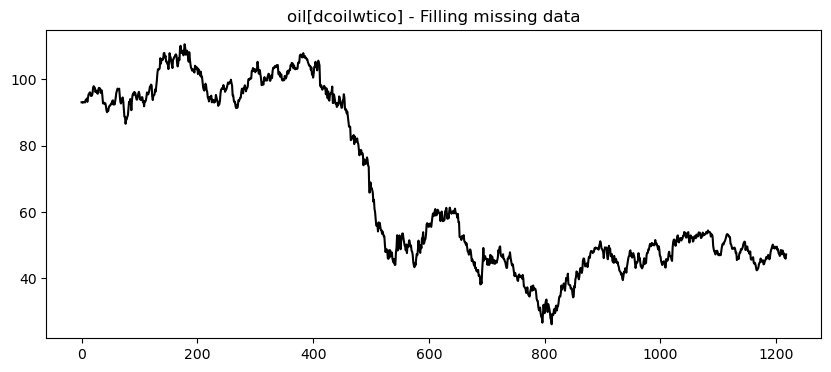

In [412]:
oil = pd.read_csv("../data/oil.csv")
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(oil['dcoilwtico'].bfill()) #ffill, bfill, mean, median, linear
# oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='index')
plt.figure(figsize=(10, 4))
plt.plot(oil['dcoilwtico'], color='black')
plt.title('oil[dcoilwtico] - Filling missing data')
plt.show()

In [413]:
oil.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [414]:
print(oil.isna().sum())

date          0
dcoilwtico    0
dtype: int64


 <a id='task_3'></a>

### **TASK 3 - Handling Outliers (20p)**

**(a) Detect outliers using methods such as the IQR method or Z-score** ✅
<br>
Ans

**(b) Decide whether to remove, cap, or transform the outliers. Justify your decisions** ✅
<br>
Removing rows because they have one or several irregular features is the last resort, as one should try to retain as much information as possible for the following training stage. Outlier removal is valid in extreme conditions say when we suspect there is a measurement error.

 The target values/labels is the ground truth and must not be 

Try to understand why we have outliers and their signifigance

train(sales) <== ground truth
train(onpromotion)

test(onpromotion)

transactions(transactions)

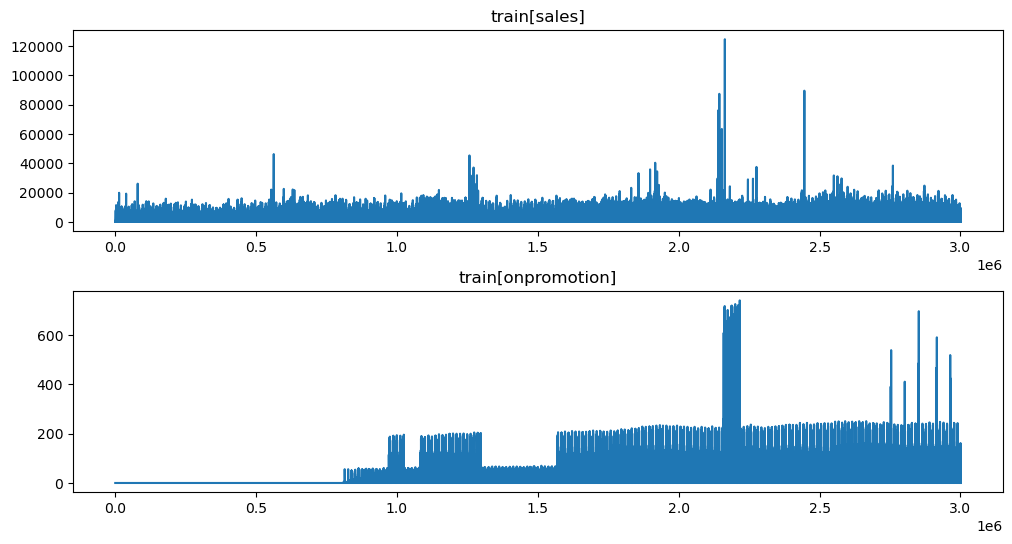

In [415]:
fig, axs = plt.subplots(2,1,figsize=(12, 6)); fig.subplots_adjust(wspace=0.2, hspace=0.3)
axs[0].plot(train['sales']); axs[0].set_title('train[sales]')
axs[1].plot(train['onpromotion']); axs[1].set_title('train[onpromotion]')
plt.show()

 <a id='task_4'></a>

### **TASK 4 - Data Transformation (30p)**

**(a) Encoding Categorical Data**
<br>
✅ **Apply label encoding or one-hot encoding to transform categorical data**
<br>

✅ **Justify your choice of encoding method**
<br>
In order for machine learning algorithms to process the data effectively all features must be in numerical form. In particular categorical data must be converted either using label encoding or one-hot encoding. The nature of the variable and the impact on model performance must be considered when selecting adequate encoding technique. We differentiate between ordinal and nominal features, the former is categories having a specific order or ranking, while the latter have no inherent ordering. Ordinal/nominal categories are mapped into label and one-hot encoding respectively.

Note that if a nominal category contains a large class of values, one-hot encoding will generate corresponding many new features which may impact model performance. Then label encoding may be considered to compact the number of features, but the downside is the model then may assume specific ordering or relationship among labels, which leads to biased results and incorrect predictions.

Here most categorical data was converted using one-hot encoding with the exception of holidays['description'] being so extensive that is is likely more efficient to use label encoding. There is not always a clear-cut answer so one might experiment with both encoding techniques to see which provides optimal model performance.

In [416]:
encoded = pd.get_dummies(train['family'], prefix='fam')
train = pd.concat([train, encoded], axis=1)
train = train.drop(['family'], axis=1)
train.head()

,id,date,store_nbr,sales,onpromotion,fam_AUTOMOTIVE,fam_BABY CARE,fam_BEAUTY,fam_BEVERAGES,fam_BOOKS,...,fam_MAGAZINES,fam_MEATS,fam_PERSONAL CARE,fam_PET SUPPLIES,fam_PLAYERS AND ELECTRONICS,fam_POULTRY,fam_PREPARED FOODS,fam_PRODUCE,fam_SCHOOL AND OFFICE SUPPLIES,fam_SEAFOOD
0,0,1356998400000000000,1,0.0,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1356998400000000000,1,0.0,0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1356998400000000000,1,0.0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1356998400000000000,1,0.0,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,1356998400000000000,1,0.0,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [417]:
encoded = pd.get_dummies(test['family'], prefix='fam')
test = pd.concat([test, encoded], axis=1)
test = test.drop(['family'], axis=1)
test.head()

,id,date,store_nbr,onpromotion,fam_AUTOMOTIVE,fam_BABY CARE,fam_BEAUTY,fam_BEVERAGES,fam_BOOKS,fam_BREAD/BAKERY,...,fam_MAGAZINES,fam_MEATS,fam_PERSONAL CARE,fam_PET SUPPLIES,fam_PLAYERS AND ELECTRONICS,fam_POULTRY,fam_PREPARED FOODS,fam_PRODUCE,fam_SCHOOL AND OFFICE SUPPLIES,fam_SEAFOOD
0,3000888,1502841600000000000,1,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3000889,1502841600000000000,1,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3000890,1502841600000000000,1,2,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3000891,1502841600000000000,1,20,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3000892,1502841600000000000,1,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [418]:
cols = ['city','state','type']
encoded = pd.get_dummies(stores, columns=cols)
stores = pd.concat([stores, encoded.drop(columns=['store_nbr', 'cluster'])], axis=1)
stores = stores.drop(columns=cols)
stores.head()

,store_nbr,cluster,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
0,1,13,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,2,13,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,3,8,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,4,9,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,5,4,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [419]:
cols = ['type','locale','locale_name']
encoded = pd.get_dummies(holidays, columns=cols)
holidays = pd.concat([holidays, encoded.drop(columns=['date', 'transferred', 'description'])], axis=1)
holidays = holidays.drop(columns=cols)
 
enc = LabelEncoder()
label = enc.fit_transform(holidays['description'])
holidays.drop("description", axis=1, inplace=True)
holidays["description"] = label

holidays.head()

,date,transferred,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day,locale_Local,locale_National,...,locale_name_Manta,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,description
0,1330646400000000000,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,25
1,1333238400000000000,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,54
2,1334188800000000000,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,18
3,1334361600000000000,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,6
4,1334966400000000000,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,8


**(b) Feature Scaling**
<br>
✅ **Apply feature scaling techniques**
<br>
Min-Max scaler is good when standard deviation is small and distribution is not Gaussian. But sensitive to outliers.

Standardization/normalization works good with normally distributed data.

✅ **Explain why feature scaling is necessary and how it impacts the model**
<br>
Notably one of the advantages of tree-based models is they can work directly on data without need for any feature scaling. However most machine learning algorithms including stochastic gradient descent (SGD), principal component analysis (PCA), distance-based algorithms (such k-nearest neighbours) and support vector machines (SVM), achieve stable and faster training with scaled features. Ultimately this can also improve overall performance of the trained model.

Feature scaling ensures that all features are on a comparable scale and range, and can prevent numerical instability (overflow or underflow problems) by avoiding significant scale disparities between features. Scaling/normalization is also critical in deep neural networks (batch normalization) so we can avoid the vansihing/exploding gradients problem.

Every feature should be able to contribute fairly during model training, but in real life data may comprise features of very different magintude, such that bigger scale features may dominate the learning, producing sub-optimal predictions. The machine learning models and algorithms does not account for unit of the values. So they tend to put more emphasis on greater valued features and less importance on smaller features, even if the smaller features can be of high signifigance.

 <a id='task_5'></a>

### **TASK 5 - Data Splitting (10p)**
**(a) Split the preprocessed dataset into training and testing sets** ✅
<br>
Note this dataset was explicitly provided with pre-defined training and test data, thus splitting is not strictly required. In the general case one is provided with a singular data volume, that must be divided into training and test sets. It is customary further splitting the training data into training and validation data, both used during the training process. Training data is provided to the learning algorithm to train the model (tuning of model parameters), while the validation data is important for optimizing the hyperparameters.

In [420]:
X = train.drop('sales', axis=1)
y = train['sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)

**(b) Explain the importance of splitting the data and how it prevents overfitting** ✅
<br>
When constructing and training a model one must carefully balance model complexity/capacity against available training data. In many cases the model may achieve 100% performance metric evaluated on its training data. Perfect score is undesirable as this indicates the model has overfitted on training data, and is likely not to generalize well later on new unseen data. Overfitting and underfitting both lead to sub-optimal models and the trick is to train a model enough that it understands the most important characteristics of the training data, without learning all nitricate data details (such as noise or outliers). 

Test data is essential when conducting final evaluation of model performance after training is completed. Test data is a smaller batch of the original data set, that is kept aside/hidden from the model during training. When we evaluate the final model with this test data it should reveal how successfull the training was, and what level of performance one should expect from the model on the average case. Naturally the model performs shows better performance on training data compared to test data, however too large deviation might suggest overfitting.

One assumption is that training and test data are of same origin and therefore similar properties, this must be checked during data exploratory analsys. If they are too dissimilar this must be taken care of during data pre-processing. Often when splitting the data it can be beneficial to utilize random data sample scheme.

During model training the validation data set is not directly involved in traning the model, but plays a similar role to the test data. While training the model is evaluated on the validation data and we can utilize early stopping as a technique to avoid overfitting. The training loop is stopped once evaluation on validation data indicates overfitting.

 <a id='task_6'></a>

### **TASK 6 - Bonus Task (Optional - 10p)**